In [1]:
def precision(y_true, y_test):
    tp, fp=0,0
    for yt, yp in zip(y_true, y_test):
        if yt==yp==1:
            tp+=1
        elif yp==1 and yt==0:
            fp+=1
#     print('tp=',tp, 'fp=',fp)
    return tp/(tp+fp)

l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

precision(l1,l2)

0.6666666666666666

In [2]:
def recall(y_true, y_test):
    tp, fn=0,0
    for yt, yp in zip(y_true, y_test):
        if yt==yp==1:
            tp+=1
        elif yp==0 and yt==1:
            fn+=1
#     print('tp=',tp, 'fn=',fn)
    return tp/(tp+fn)

recall(l1,l2)

0.5

Thesh: 0.049, Precision: 0.214, Recall: 1.000
Thesh: 0.059, Precision: 0.154, Recall: 0.667
Thesh: 0.079, Precision: 0.167, Recall: 0.667
Thesh: 0.086, Precision: 0.182, Recall: 0.667
Thesh: 0.111, Precision: 0.100, Recall: 0.333
Thesh: 0.116, Precision: 0.111, Recall: 0.333
Thesh: 0.160, Precision: 0.125, Recall: 0.333
Thesh: 0.176, Precision: 0.143, Recall: 0.333
Thesh: 0.185, Precision: 0.167, Recall: 0.333
Thesh: 0.273, Precision: 0.200, Recall: 0.333
Thesh: 0.316, Precision: 0.250, Recall: 0.333
Thesh: 0.331, Precision: 0.333, Recall: 0.333
Thesh: 0.391, Precision: 0.500, Recall: 0.333
Thesh: 0.620, Precision: 1.000, Recall: 0.333


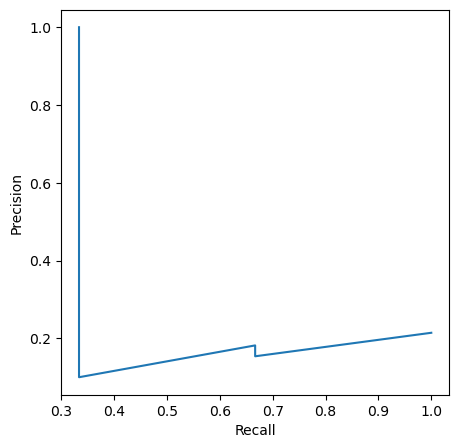

In [3]:
# precision recall curve

import matplotlib.pyplot as plt

y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708, 0.0490937, 0.0191491, 0.17554844,
            0.15952202, 0.03819563, 0.11639273, 0.079377, 0.08584789, 0.39095342,
            0.27259048, 0.03447096, 0.04644807, 0.03543574, 0.18521942, 0.05934905,
            0.61977213, 0.33056815]

precisions, recalls=[], []
thresholds = [0.0490937 , 0.05934905, 0.079377,
                0.08584789, 0.11114267, 0.11639273,
                0.15952202, 0.17554844, 0.18521942,
                0.27259048, 0.31620708, 0.33056815,
                0.39095342, 0.61977213]

for n,i in enumerate(thresholds, start=1):
    temp_preds=[0 if x<i else 1 for x in y_pred]
    precisions.append(precision(y_true, temp_preds))
    recalls.append(recall(y_true, temp_preds))

for i,j,k in zip(thresholds, precisions, recalls):
    print(f'Thesh: {i:.3f}, Precision: {j:.3f}, Recall: {k:.3f}')

plt.figure(figsize=(5,5))
plt.plot(recalls, precisions)
plt.xlabel('Recall')
plt.ylabel('Precision');

In [4]:
def f1(y_true, y_test):
    p,r=precision(y_true, y_test),recall(y_true, y_test)
    return 2*p*r/(p+r)

f1(l1,l2)

0.5714285714285715

In [5]:
def tpr(y_true, y_test):
    return recall(y_true, y_test)

def fpr(y_true, y_test):
    tn, fp=0,0
    for yt, yp in zip(y_true, y_test):
        if yt==yp==0:
            tn+=1
        elif yp==1 and yt==0:
            fp+=1
    return fp/(tn+fp)
            
tpr_list = []
fpr_list = []
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
            0.9, 0.5, 0.3, 0.66, 0.3, 
            0.2, 0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]

for t in thresholds:
    temp_preds=[1 if x>=t else 0 for x in y_pred]
    tpr_list.append(tpr(y_true, temp_preds))
    fpr_list.append(fpr(y_true, temp_preds))

In [6]:
import pandas as pd

df=pd.DataFrame({'treshold': thresholds,
                'TPR': tpr_list,
                'FPR': fpr_list})
df

,treshold,TPR,FPR
0,0.00,1.0,1.0
1,0.10,1.0,0.9
2,0.20,1.0,0.7
3,0.30,0.8,0.6
4,0.40,0.8,0.3
5,0.50,0.8,0.3
6,0.60,0.8,0.2
7,0.70,0.6,0.1
8,0.80,0.6,0.1
9,0.85,0.4,0.1


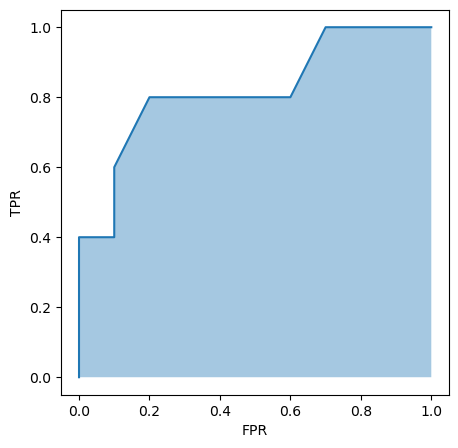

In [7]:
# auc

plt.figure(figsize=(5,5))
plt.plot(fpr_list, tpr_list)
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.xlabel('FPR')
plt.ylabel('TPR');

In [8]:
# log loss

import numpy as np

def log_loss(y_true, y_proba):
    logs=[]
    for yt, yp in zip(y_true, y_proba):
        yp=np.clip(yp, 1e-15, 1-1e-15)
        ll=-1*(yt*np.log(yp)+(1-yt)*np.log(1-yp))
        logs.append(ll)
    return np.mean(logs)

y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

log_loss(y_true, y_proba)

0.49882711861432294

In [23]:
# multiclass precision

from collections import Counter

def true_positive(y_true, y_pred):
    tp=0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 0:
            tn += 1
    return tn

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 0 and yp == 1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == 1 and yp == 0:
            fn += 1
    return fn


def macro_precision(y_true, y_pred):
    precision=0
    num_classes=len(np.unique(y_true))
    
    for c in range(num_classes):
        temp_y_true=[1 if x==c else 0 for x in y_true]
        temp_y_pred=[1 if x==c else 0 for x in y_pred]
        tp, fp=true_positive(temp_y_true, temp_y_pred), false_positive(temp_y_true, temp_y_pred)
        precision+=tp/(tp+fp)
        
    return precision/num_classes


def micro_precision(y_true, y_pred):
    tps, fps=0, 0
    num_classes=len(np.unique(y_true))
    
    for c in range(num_classes):
        temp_y_true=[1 if x==c else 0 for x in y_true]
        temp_y_pred=[1 if x==c else 0 for x in y_pred]
        tps+=true_positive(temp_y_true, temp_y_pred)
        fps+=false_positive(temp_y_true, temp_y_pred)
    
    precision=tps/(tps+fps)
    return precision


def weighted_precision(y_true, y_pred):
    precision=0
    num_classes=len(np.unique(y_true))
    class_counts=Counter(y_true)
    
    for c in range(num_classes):
        temp_y_true=[1 if x==c else 0 for x in y_true]
        temp_y_pred=[1 if x==c else 0 for x in y_pred]
        tp, fp=true_positive(temp_y_true, temp_y_pred), false_positive(temp_y_true, temp_y_pred)
        temp_prec=tp/(tp+fp)
        precision+=temp_prec*(sum(temp_y_true)/len(y_true))
    return precision



y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
print(macro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="macro"))

print(micro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="micro"))

print(weighted_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="weighted"))

0.3611111111111111
0.3611111111111111
0.4444444444444444
0.4444444444444444
0.39814814814814814
0.39814814814814814


In [21]:
# milticlass recall

from sklearn import metrics


def macro_recall(y_true, y_pred):
    recalls=0
    for c in range(len(np.unique(y_true))):
        temp_class_true=[1 if i==c else 0 for i in y_true]
        temp_class_pred=[1 if i==c else 0 for i in y_pred]
        recalls+=recall(temp_class_true, temp_class_pred)
    return recalls/len(np.unique(y_true))

def micro_recall(y_true, y_pred):
    tps, fns=0,0
    for c in range(len(np.unique(y_true))):
        temp_class_true=[1 if i==c else 0 for i in y_true]
        temp_class_pred=[1 if i==c else 0 for i in y_pred]
        tps+=true_positive(temp_class_true, temp_class_pred)
        fns+=false_negative(temp_class_true, temp_class_pred)
    return tps/(tps+fns)

def weighted_recall(y_true, y_pred):
    recalls=0
    for c in range(len(np.unique(y_true))):
        temp_class_true=[1 if i==c else 0 for i in y_true]
        temp_class_pred=[1 if i==c else 0 for i in y_pred]
        recalls+=recall(temp_class_true, temp_class_pred)*(sum(temp_class_true)/len(temp_class_true))
    return recalls


y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(macro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="macro"))

print(micro_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="micro"))

print(weighted_recall(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred, average="weighted"))

0.4166666666666667
0.4166666666666667
0.4444444444444444
0.4444444444444444
0.4444444444444444
0.4444444444444444


In [31]:
t=set([1,2,1,1,3,3,1])
p=set([1,0,3])


p.intersection(t)

{1, 3}

In [67]:
# precision at k (P@k)

def pk(y_true, y_pred, k):
    if k!=0:
        y_pred=y_pred[:k]
        return (len(set(y_pred).intersection(set(y_true))))/k
    return 0


def apk(y_true, y_pred, k):
    aps=0
    for i in range(1,k+1):
        aps+=pk(y_true, y_pred, i)
    return aps/k if aps!=0 else 0
        

y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
    ]

y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
    ]


for i in range(len(y_true)):
    for j in range(1, 4):
        print(set(y_pred[i]).intersection(set(y_true[i])), j)
        print(f"""
        y_true={y_true[i]},
        y_pred={y_pred[i]},
        AP@{j}={apk(y_true[i], y_pred[i], k=j)}
        """)

{1, 2} 1

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@1=0
        
{1, 2} 2

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@2=0.25
        
{1, 2} 3

        y_true=[1, 2, 3],
        y_pred=[0, 1, 2],
        AP@3=0.38888888888888884
        
set() 1

        y_true=[0, 2],
        y_pred=[1],
        AP@1=0
        
set() 2

        y_true=[0, 2],
        y_pred=[1],
        AP@2=0
        
set() 3

        y_true=[0, 2],
        y_pred=[1],
        AP@3=0
        
set() 1

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@1=0
        
set() 2

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@2=0
        
set() 3

        y_true=[1],
        y_pred=[0, 2, 3],
        AP@3=0
        
{2, 3} 1

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@1=1.0
        
{2, 3} 2

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@2=1.0
        
{2, 3} 3

        y_true=[2, 3],
        y_pred=[2, 3, 4, 0],
        AP@3=0.888